In [18]:
#MP-1
#Implement Decision Tree (DT), Random Forest (RF) and Support Vector Machine (SVM) for the classification
#of heart_dataset.csv (dataset).
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

# dataset is provided to you on google classroom

In [2]:
import os
print(os.listdir(r"D:/AI Lectures/Python/MachineLearning/Assignment1"))
df = pd.read_csv(r'heart_dataset.csv')
# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'Decision Tree.rar', 'heart_dataset.csv', 'MP-1.ipynb', 'SVM + Random Forest Tasks.rar']


In [3]:
#Fill this cell

# Read the data and assign it to a variable, variable name should be df for simplicity
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [4]:
#Fill this cell
# Show the dataset in tabular form.
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#Fill this cell
# In order to know about unknown, missing or unproper data, as well as datatype of the dataset
# which funtion() / method() should be used? 
df[df.isnull().any(axis=1)].count()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#Fill this cell
#Describe the dataset statistically
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


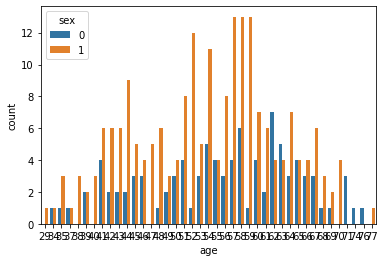

In [7]:
#Fill this cell
# Seaborn countplot gives the number of data in the each class, use countplot for this purpose
#g = sns.boxplot(x=df["age"])
#sns.distplot(df.age, bins=100)
sns.countplot(x="age", hue="sex",data=df)

In [10]:
# y has target data (clases) such as 1 and 0. 
y = df.target.values
# This means that take target data out from the datasets and assign them to x_data variable
x_data = df.drop(["target"],axis=1)

In [13]:
#Normalization is used to handle with unbalanced features
#This gives the values to the features which range from zero to 1.
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [17]:
#Fill this cell

# Split the data into two part training (70%) and testing (30%)
#HInt test_size=0.3 means %30 is splited as test_data
#we need to give any number to random_state in order to split data in the same way when it is reruned
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
print(y_test)

[0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


In [22]:
#Fill this cell
# Build Decision Tree Classification Model
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [ ]:
#Fill this cell
# Use confusion matrix to evaluate the Decision Tree Classification Model

In [ ]:
#Fill this cell
# Heatmap visualization of cunfusion matrix of the Decision Tree Classification Model

In [ ]:
#Fill this cell
# Build Random Forest Classification Model


In [ ]:
#Fill this cell
# Here we use confusion matrix to evaluate the Random Forest Classification Model


In [ ]:
#Fill this cell
# Heatmap visualization of cunfusion matrix of the Random Forest Classification Model


In [ ]:
#Fill this cell
# Build Support Vector Machine Model


In [ ]:
#Fill this cell
# Here we use confusion matrix to evaluate the Support Vector Machine Model


In [ ]:
#Fill this cell
# Heatmap visualization of cunfusion matrix of the Support Vector Machine Model

In [ ]:
#Fill this cell
#Confusion Matrix comaprison of the algorithmsa